<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.3/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Dropout

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.utils.data as data_utils
from torch.nn import functional as F
import torch.optim as optim
import os
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


[1] Data

In [ ]:
# MNIST dataset 
from tensorflow import keras
mnist = keras.datasets.mnist
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [ ]:
#Data loader
batch_size = 1000
train_data = data_utils.TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))

trainloader = data_utils.DataLoader(train_data, batch_size=batch_size, shuffle=True)


[2] Dropout Model

In [ ]:
drop_prob1 = 0.5
drop_prob2 = 0.2

class Dropout(torch.nn.Module):
  def __init__(self):
    super(Dropout, self).__init__()

    self.fc1 = torch.nn.Linear(784,256)
    self.fc2 = torch.nn.Linear(256,64)
    self.fc3 = torch.nn.Linear(64,10)
    self.dp1 = torch.nn.Dropout(p = drop_prob1)
    self.dp2 = torch.nn.Dropout(p = drop_prob2)

  def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h1dp = self.dp1(h1)
            
        h2 = F.relu(self.fc2(h1dp))
        h2dp = self.dp2(h2)

        output = self.fc3(h2dp)
            
        return output

model = Dropout().to(device)

In [ ]:
epoch = 20
learning_rate = 0.01
weight_decay = 1e-5

loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)

[3] Train

In [ ]:
loss_list = []

for epoch_num in range(epoch):
    model.train()
    average_loss = 0
    
    for batch_idx, (images, labels) in enumerate(trainloader):
        num_of_mini_batch = len(trainloader)
        
        input_images = images.reshape(1000,784)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        predicted = model(input_images)
        
        labels_long = torch.tensor(labels, dtype = torch.long)
        labels_long = labels_long.to(device)
        
        loss = loss_function(predicted, labels_long)
        
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.detach().numpy())
        
        average_loss += (loss.item()/num_of_mini_batch)
   
    print("Epoch = {}\tAverage loss = {}".format((epoch_num+1), average_loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch = 1	Average loss = 5.49433498183886
Epoch = 2	Average loss = 1.3598594466845189
Epoch = 3	Average loss = 0.9443229079246522
Epoch = 4	Average loss = 0.7722308248281479
Epoch = 5	Average loss = 0.6698539207379023
Epoch = 6	Average loss = 0.6332634061574935
Epoch = 7	Average loss = 0.6077441622813543
Epoch = 8	Average loss = 0.5787004197637239
Epoch = 9	Average loss = 0.552726013958454
Epoch = 10	Average loss = 0.5576462432742119
Epoch = 11	Average loss = 0.5405519351363184
Epoch = 12	Average loss = 0.5312656740347544
Epoch = 13	Average loss = 0.5168568705519041
Epoch = 14	Average loss = 0.5133263702193895
Epoch = 15	Average loss = 0.5066045800844828
Epoch = 16	Average loss = 0.5080694407224656
Epoch = 17	Average loss = 0.5071712856491407
Epoch = 18	Average loss = 0.501035671432813
Epoch = 19	Average loss = 0.5008388191461562
Epoch = 20	Average loss = 0.4869235108296077


loss_list의 길이 = 1200


Text(0.5, 0, 'iterations')

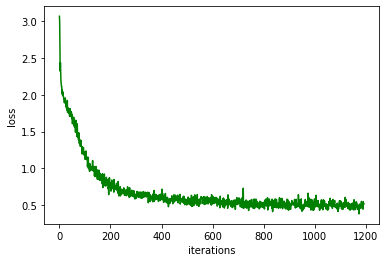

In [ ]:
print("loss_list의 길이 =",len(loss_list))
plt.plot(np.array(loss_list[7:]), 'g')
plt.ylabel('loss')
plt.xlabel('iterations')